# Projekt nr 1
### Piotr Olesiejuk

### Cel projektu

Celem projektu było zaimplementowanie sieci neuronowej o zmiennej liczbie warstw, służącej do klasyfikowania liczb dostępnych w zbiorze MNIST.

### Dane wejściowe

1. Zbiór treningowy: 60 tys. obrazków pisma odręcznego
2. Zbiór testowy: 10 tys. obrazków pisma odręcznego

### Wynik

Wynikiem jest zbiór wag sieci oraz tzn. biasów, które pozwalają przyporządkować nieznanemu obrazkowi odpowiednią klasę. 

### Notacja

W opisie projektu będę posługiwał się następującymi oznaczeniami:
- w - wagi połączeń pomiędzy neuronami
- a - wyjścia z poszczególnych warstw sieci
- b - bias
- y - poprawna klasyfikacja danego obrazka
- delta - blad w warstwie
- L - oznaczenie warstwy wyjściowej
- $\eta$ - współczynnik uczenia
- $\lambda$ - współczynnik regularyzacji

### Opis projektu

#### Wstęp
Sieć neuronowa składa się z warstw neuronów, które połączone są miedzysobą. Zakładamy (przynajmniej w spektrum tego projektu), że neurony w jednej warstwie nie są ze sobą połączone oraz, że każdy neuron z jednej warstwy jest połączony z każdym z neuronów w warstwie sąsiadującej. Cały model sieci neuronowej oparty jest o model samego neuronu, który można przyjąć na różne sposoby. W projekcie wykorzystano model neuronu sigmoidalnego, ilustruje go poniższy rysunek [1].

![Perceptron](./img/perceptron.png)

Wartości $x_1$, $x_2$, $x_3$ odpowiadają wyjściom z neuronów z poprzedniej warstwy. Każde połączenie pomiędzy danym neuronem warstwy $(l-1)$-szej z neuronem warstwy $l$-tej posiada odpowiednią wagę. Zaś wyjście stanowi kombinację liniową wektora wejść i wektora wag zsumowaną z biasem neuronu, na którą nałożona jest funkcja sigmoidalna. Obrazują to poniższe równania: 

<center>
$$x = [x_1, x_2, \dots, x_n]^T \\
w = [w_1, w_2, \dots, w_n]^T \\
z = w^Tx + b \\
a = \sigma(z)$$
</center>

Powyższy zapis jest poprawny dla jednego neuronu, jednak sieć składa się z wielu neuronów i wielu warstw. Dla dowolnej warstwy można bardzo przystępnie przedstawić wyjście z warstwy w postaci zwektoryzowaniej.

<center>
$$a = \sigma(W \cdot X + b)$$
</center>

Gdzie:
- **W** to macierz wag, w której dany wiersz odpowiada zestawowi wag dla danego neuronu.
- **X** to macierz wejść, wektoryzacja pozwala na obliczenia dla kilku różnych wejść jednocześnie (tzn. mini-batch)
- **b** to wektor biasów poszczególnych neuronów

Funkcja sigmoidalana wprowadzająca nieliniowość do modelu jest opisana następującym wzorem

<center>
$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$
</center>

#### Architektura sieci
Sieć składa się z warstwy wejściowej o 784 neuronach i warstwy wyjściowej o 10 neuronach. Pomiędzy nimi znajduje się ustalona przez użytkownika ilość warstw ukrytych o również zadawanej przez niego liczbie neuronów w warstwie. Architekturę opisuje poniższy schemat.
![Architektura](./img/architektura.png)

#### Funkcja kosztu
Aby badać jakość działania sieci wprowadza się funkcję kosztu, która skalarnie określa miarę skuteczności sieci. Zadanie zostało zrealizowane z wykorzystaniem logistycznej funkcji kosztu opisanej poniższym wzorem

$$ J(W) = \frac{1}{m} \sum_{i=1}^{m} [y^{(i)}\circ \log(a^{(L)}) + (1 - y^{(i)})\circ\log(1 - a^{(L)})] + \frac{\lambda}{2m} \sum_{i=1}^{L-1} W^i \circ W^i$$

#### Forward propagation
Informacje ze wstępu pozwalają na skonstruowanie algorytmu propagacji do przodu. Polega ona na policzeniu wyjść z poszczególnych warstw. Dla warstwy wejściowej wyjściem jest po prostu ta warstwa, natomiast dla kolejnych warstw wejściem jest wyjście z warstwy poprzedniej. Algorytm wygląda następująco:

In [ ]:
1. x <- mini_batch
2. a[0] = x
3. Dla i-tej warstwy policz:
    a[i] = simoid(wagi[i] * a[i-1] + bias)
4. Zwróć wszystkie a w postaci listy

#### Backpropagation
Po obliczeniu wszystkich wyjść z poszczególnych warstw sieci, w szczególności ostatnie wyjście jest interpretowane jako to klasyfikujące obrazek do danej klasy. Ideą metody propagacji wstaczej jest obliczenie błędu w warstwie wyjściowej i przeniesieniu go na warstwy poprzednie. Poniżej został zaprezentowany algorytm tego postępowania

In [ ]:
1. Oblicz błąd w warstwie wyjsciowej jako delta[L] = a[L] - y
2. Dla warstw l-1, ... 2 oblicz blad:
        delta[i] = (w[i].T * delta_from_next_layer) * pochodna_funkcji_kosztu
3. Zwróć wszystkie delty w postaci listy

#### Gradientowa metoda uczenia
Dostosowywanie wag do modelu sieci odbywa się z wykorzystaniem gradientu. Polega on na tym, że w każdym kroku szukamu kierunku nawiększego wzrostu funkcji kosztu i tak zmniejszamy wagi, aby poruszać się w przeciwnym kierunku. Z racji tego, że zbiór danych jest bardzo obszerny (60 tys. przykładów), obliczenie funkcji kosztu byłoby kosztowne używając w każdym kroku całego zbioru uczącego. Rozwiązaniem jest zastosowanie tzn. mini-batch, czyli liczenia gradientu dla podzbiorów zbioru treningowego o określonej wielkości i uśredniania w zakresie tych grup. Przy takim podejściu aktualizacja wag i biasów w każdej warstwie opisują wzory:

<center>
$$ W^l = W^l - \frac{\eta}{m}( \sum_x \delta^{x,l}(a^{x,l-1})^T + \lambda \cdot W^l )\\
 b^l = b^l - \frac{\eta}{m}\sum_x \delta^{x,l}$$
</center>

#### Inicjalizacja parametrów początkowych
Wartości wag oraz biasów przed rozpoczęciem nauki sieci są generowne z rozkładu normalnego o średniej 0 i wariancji równej 1. Przy czym każda waga jest dodatkowo jeszcze dzielona przez 10.
Obrazki w zbiorze treningowym są natomiast standaryzowane przekształceniem:

<center>
$$x := \frac{x - \mu}{\sigma}$$
</center>

gdzie $\mu$ oraz $\sigma$ to odpowiednio średnia i odchylenie standardowe dla każdego wektora przykładów

#### Algorytym programu
Poniżej przedstawiony został pełny algorytm programu uwzględniający powyższe rozważania

In [ ]:
1. Wprowadz dane: hidden_layers, neurons_per_layer, eta, lambd, mini_batch_size, epochs
2. Zainicjuj wagi losowymi wartosciami z rozkladu normalnego
3. Wczytaj zbior testowy i treningowy
4. Podziel zbior treningowy na mini-batche o wielkosci mini_batch_size
5. Dla n epok uczenia wykonaj:
6.      Dla każdego mini-batch wykonaj:
7.          a := oblicz wyjścia z każdej warstwy używając forward propagation
8.          delta := oblicz błąd w poszczególnych warstwach używając backpropagation
9.          zaktualizuj wagi licząc gradient

### Specyfikacja metod klasy Network

Specyfikacja poszczególnych metod została opisana w postaci dokumentacji w kodzie Python. Po skompilowaniu kodu klasy Network, jest dostępna poprzez poniższe wywołanie

In [ ]:
help(Network)

Dostęp do poszczególnych metod można uzyskać analogicznie poprzez

In [ ]:
help(Network.<method>)
?Network.<method>

#### Lista metod
1. __init__
2. load_data
3. vector_label
4. classification_table
5. set_up
6. activation
7. derivative
8. forwardpropagation
9. backprop
10. backpropagation
11. gradient_descent
12. cost
13. shuffle
14. visualise_efectiveness_by_class
15. visualise_error_by_class
16. visualise_error_for_class
17. visualise_all_incorrect_images
18. roc_analysis
19. train
20. test


### Ilustracja działania programu
W tym podpunkcie przedstawię na przykładzie w jaki sposób trenować sieć i wizualizować wyniki. Założyłem, że nazwy metod są wystarczające, aby dodatkowo ich nie opisywać. Każda metoda ma swój opis w dokumentacji.

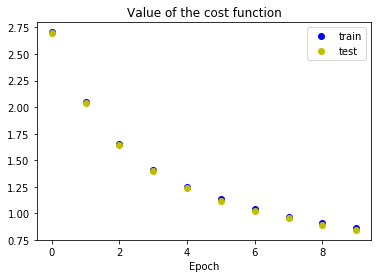

In [2]:
n = Network(hidden_layers = 1, neurons_per_layer = 30, data_folder = 'data', eta = 0.03, lambd = 0, mini_batch_size = 200)
n.train(epochs = 10)

In [3]:
n.test()

0.8924

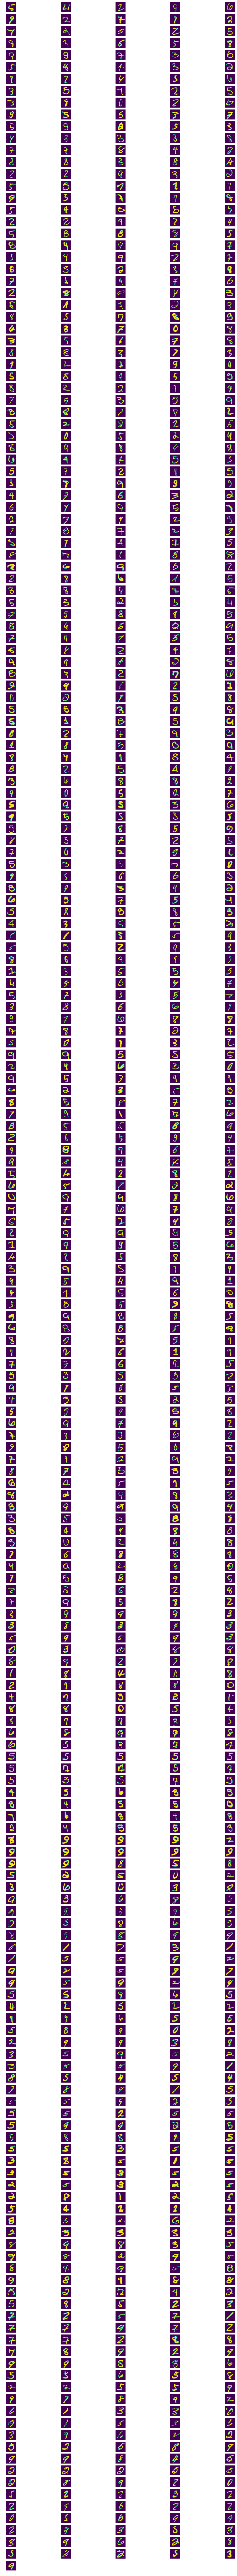

In [4]:
n.visualise_all_incorrect_images()

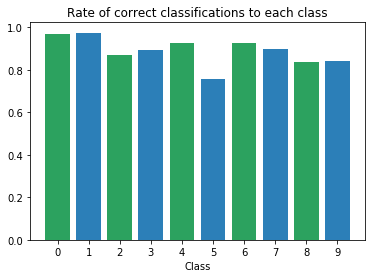

In [5]:
n.visualise_effectiveness_by_class()

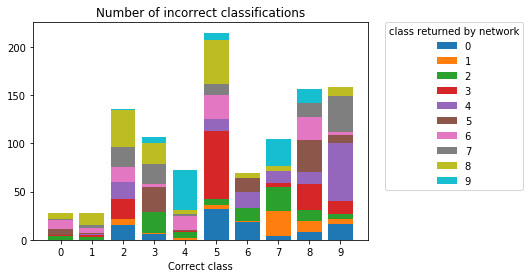

In [6]:
n.visualise_errors_by_class()

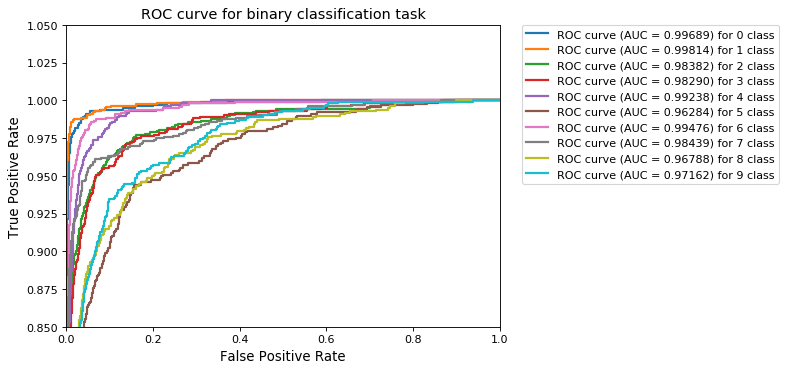

In [7]:
n.roc_analysis(xlim = [0, 1], ylim = [0.85, 1.05])

In [10]:
n.classification_table()

,0,1,2,3,4,5,6,7,8,9
0,952.0,0.0,4.0,1.0,0.0,6.0,10.0,1.0,6.0,0.0
1,0.0,1107.0,3.0,2.0,1.0,1.0,5.0,3.0,13.0,0.0
2,15.0,7.0,896.0,20.0,18.0,0.0,16.0,20.0,39.0,1.0
3,6.0,1.0,22.0,903.0,0.0,26.0,3.0,21.0,21.0,7.0
4,0.0,2.0,6.0,1.0,910.0,1.0,15.0,2.0,4.0,41.0
5,32.0,4.0,6.0,71.0,12.0,677.0,25.0,12.0,45.0,8.0
6,18.0,2.0,13.0,0.0,17.0,14.0,889.0,0.0,5.0,0.0
7,4.0,26.0,25.0,4.0,12.0,0.0,0.0,923.0,6.0,28.0
8,8.0,11.0,12.0,27.0,12.0,34.0,23.0,15.0,817.0,15.0
9,16.0,6.0,5.0,13.0,60.0,9.0,3.0,37.0,10.0,850.0


### Wyniki

#### Najlepszy wynik

Najepsza sieć jaką udało się wytrenować przy pomocy napisanego programu posiadała skuteczność klasyfikacji na poziomie 97.12%. Była to sieć o jednej warstwie ukrytej o 180 neuronach w warstwie oraz parametrach: $\lambda$ = 0.05, $\eta$ = 0.03, mini_batch = 200. Liczba epok treningu wynosiła 200. Poniżej znajdują się wykresy wizualizujące wyniki dla tej sieci.

![Najlepszy](./img/najlepszy_wynik_2.png)

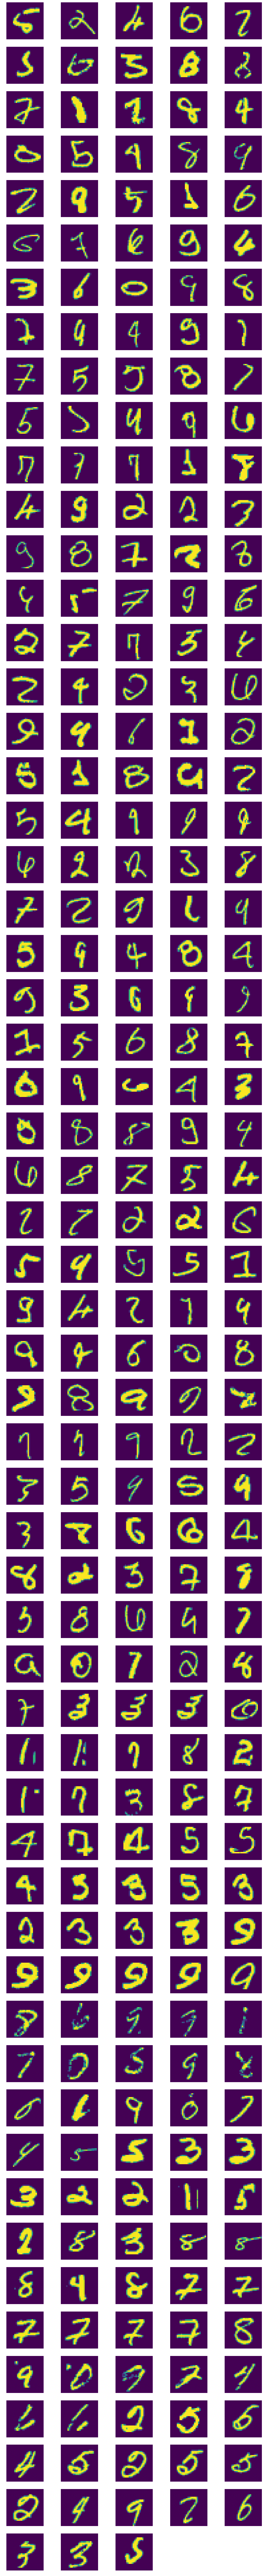

In [41]:
Wszystkie niepopranie sklasyfikowane obrazki

#### Głębokość sieci
Sieć analizowałem pod różnymi kątami, przede wszystkim jak zmienia się jej zachowanie przy zmianie parametrów takich jak liczba warstw czy współczynnik uczenia.

Na początku chciałbym przedstawić wyniki dla różnych głębokości sieci. Na poniższym rysunku zestawione są w kolejności wierszowej od lewej do prawej wyniki dla sieci od 1 do 6 warstw ukrytych. 

![Glebokosc](./img/glebokosc.png)

Jak widać na powyższych rysunkach, w ramach wzrostu głębokości sieci spada prędkość w początkowej fazie uczenia. Pojawia się tutaj problem doboru odpowiedniego współczynnika uczenia, który pozwoli na dostatecznie szybki spadek w początkowej fazie i nie spowoduje jednocześnie, że wartość funkcji kosztu będzie mijała swoje minimum. Również rozmiar mini_batch, jak okaże się w dalszej części raportu, może być istotnym parametrem do przyspieszania procesu uczenia. W powyższych przykładach wartość współczynnika uczenia była na poziomie 0.1, a zatem stosunkowo duża, co mogło spowodować tak zaburzone wyniki.

#### Pozostałe wyniki

Wyniki dla sieci o 1,2,3 warstwach są bardzo porównywalne. Osiągana skuteczność klasyfikacji tych sieci wynosi conajmniej 94%. Dla głębszych warstw sieć ma problem we wstępną fazą uczenia przez co ciężej jest ją trenować. W głębszych warstwach również sieć jest bardziej wrażliwa na zmianę poszczególnych hiperparametrów.

Z powodu tych ograniczeń zdecydowałem się przedstawić zmianę w zachowaniu sieci w zależności od różnych parametrów dla sieci jednowarstwowych o 60 neuronach. Poniższe porównania są prowadzone przy założeniu, że zmienia się jeden analizowany parametr, a pozostałe są takie same dla wszystkich przypadków. Zostały przetestowane wpływy takich parametrów jak: rozmiar_mini_batch, współczynnik regularyzacji oraz współczynnik uczenia.

#### Współczynnik uczenia
Poniżej przedstawiłem wykresy funkcji kosztu dla sieci o parametrach: mini_batch = 200, $\lambda$ = 0. Zmieniany był jedynie współczynnik uczenia. Jak widać na poniższych rysunkach sieć zachowuje się poprawnie dla dwóch pierwszych, małych współczynników uczenia. W przypadku współczynnika uczenia jeden, widać, że proces nauki jest bardzo szybki i mógłby zostać przerwany po ok. 12 epokach, ponieważ później następuje przeuczenie modelu. Dla największego współczynnika uczenia sieć zachowuje sie bardzo nieregularnie, wynikać to może z faktu, że w momencie aktualizowania wag mija ona swoje minimum.

![Wspolczynnik_uczenia](./img/wspolczynnik_uczenia.png)

#### Rozmiar mini-batch

Poniżej zaprezentowano wyniki dla różnych rozmiarów mini_batch. Parametry każdej z sieci to: $\lambda$ = 0, $\eta$ = 0.03. Jak widać wyniki nie są zaskakujące. Dla większych rozmiarów mini-batch, sieć potrzebuje więcej czasu, żeby się nauczyć, ponieważ wagi są rzadziej akutalizowane niż kiedy mini-batch jest mały.

![Mini_batch](./img/mini_batch.png)

#### Regularyzacja

Zastosowanie regularyzacji ma na celu zmniejszenia zjawiska overfittingu, czyli zbytniego dopasowywania się modelu do danych treningowych i przez to zmniejszenie możliwości generalizowania. Poniżej przykłady jak zachowuje się sieć dla parameterów:
$\eta$ = 0.01, mini-batch = 10. Lewy wykres obrazuje zachowanie sieci bez regularyzacji, wykres prawy natomiast z regularyzacją o $\lambda$ = 0.005. Faktycznie w drugim przypadku minimalizowane jest zjawisko overfittingu.

![Regularyzacja](./img/regularyzacja.png)

### Wnioski

Opisywana sieć neuronowa bardzo bardzo daje bardzo dobre klasyfikatory na poziomie ok. 94% poprawnych klasyfikacji dla sieci 1,2,3,4 warstwowych.  Warto nadmienić, że już sieci jednowarstwowe o 30 neuronach w warstwie ukrytej pozwalają na poprawną klasyfikację na poziomie ok. 90% przy stosunkowo niedużej liczbie epok trenowania przy dużych mini-batch (odpowiednio 30 i 200).

Mimo, że otrzymany najlepszy wynik wyniósł 97,12% to niewykluczone, że można otrzymać wyniki wyższe, do ok. 97,5%, dla innych parametrów sieci. Wchodzą tu ograniczenia odnośnie testowania, które jest procesem stosunkowo długim.

Jak pokazały przykłady analizy poszczególnych parametrów sieć zachowuje się w sposób przewidywalny. Zachowanie sieci w przypadku zmiany odpowiednich parametrów odpowiada wynikom jakie są oczekiwane po modyfikacji wspomnianych parametrów. Jedynym problemem jest proces uczenia w sieciach głębszych od ok. 7 warstw, które charakteryzuje się długim wstępnym procesem uczenia. Możliwym rozwiązaniem tego problemu w przypadku rozwoju tego projektu jest przyjęcie innej funkcji aktywacji neuronów. Na obecnej konfiguracji potencjalnymi rozwiązaniami przyspieszającymi trening jest przyjęcie małego mini-batch oraz zwiększenie współczynnika uczenia.

W trakcie rozwoju projektu zmieniono funkcję kosztu z kwadratowej na podaną wcześniej, operacja ta prawdopodobnie przyspieszyła proces uczenia w płytkich sieciach, natomiast nie zostały przeprowadzone szczegółowe testy tego faktu. Dodany został również momentum, natomiast jego implementacja była w bardzo późnej fazie projektu i wstępne testy nie wykazały poprawy działania w sieciach głębszych, dlatego z niego zrezygnowano.

#### Literatura

[1] M. Nielsen "Neural Networks and Deep Learning"

[2] Kurs "Machine Learining" Universytetu Stanforda na portalu coursea.org

[3] Materiały do wykładu "Metody Głębokiego Uczenia" prof. Jacka Mandziuka

[4] Dokumentacja języka Python ( w szczególności przy obliczaniu krzywych ROC wykorzystano przykład z dokumentacji biblioteki sklearn)

### Pełny kod programu

In [1]:
%matplotlib inline

import numpy as np
from collections import deque
import math
import matplotlib.pyplot as plt
import copy
import pandas as pd
from mnist import MNIST #requires pip install python-mnist
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
import winsound


class Network:
    
    def __init__(self, hidden_layers, neurons_per_layer, data_folder, eta, lambd, mini_batch_size):
        '''
        Initializes the Network with specified parameters.
        
        Parameters:
        -----------
        hidden_layers: number of hidden layers in the Network
        neuron_per_layer: number of neurons in each hidden layer
        data_folder: path of the folder where MNIST data is stored
        eta: learining rate
        lambda: parameter of regularization
        mini_batch_size: number of training examples in each mini batch
        '''
        self.k = hidden_layers + 2
        self.n = neurons_per_layer # not including bias
        self.data_folder = data_folder
        self.X, self.labels = self.load_data('train')
        self.mini_batch_size = mini_batch_size
        self.weights , self.biases = self.set_up()
        self.eta = eta
        self.lambd = lambd
        self.classify_table = np.zeros((10,10))
        self.bad_classifications = list()
    
    def load_data(self, set_type, normalize = True):
        '''
        Loads data from MINST dataset.
        
        Parameters:
        -----------
        set_type: specyfies which set should be loaded. 'train' for training, 'test' for testing
        '''
        data = MNIST(self.data_folder)
        if (set_type == 'train'):
            images, labels = data.load_training()
        else:
            images, labels = data.load_testing()
        images, labels = np.transpose(np.array(images)), self.vector_label(labels)
        if (normalize == True):
            for i in range(0, np.size(images, 1)):
                images[:, i] = (images[:, i] - np.mean(images[:, i])) / np.std(images[:, i])
        return images, labels
    
    def vector_label(self, labels):
        '''
        Transforms each element of labels list into a vector (10x1) of zeros with 1 on the index equal to element value.
        
        Parameters:
        -----------
        labels: list of values
        '''
        lab = np.zeros((10, len(labels)))
        lab[labels, range(0, len(labels))] = 1
        return lab
    
    def classification_table(self):
        '''
        Returns classification table of testing examples. Correct class are coresponding with rows and columns
        coresponds with network classification.
        '''
        return pd.DataFrame(self.classify_table)
     
    def set_up(self):
        '''
        Set up weights and biases with random values from normal distribution.
        '''
        w = list()
        b = list()
        w.append(np.random.randn(self.n, 784) / 10)  #s_j x (s_j + 1)
        b.append(np.random.randn(self.n, 1) / 10)
        for i in range(1, self.k - 2):
            w.append(np.random.randn(self.n, self.n) / 10)
            b.append(np.random.randn(self.n, 1) / 10)
        w.append(np.random.randn(10, self.n) / 10) # bo 10 cyfr
        b.append(np.random.randn(10, 1) / 10)
        return w, b
    
    def activation(self, w , x, b):
        '''
        Calculates sigmoid function over equation (w @ x) + b. Where @ means matrix multiplication.
        
        Parameters:
        -----------
        w: matrix of weigths
        x: matrix of inputs
        b: vector of biases
        '''
        z = (w @ x) + b
        return 1 / (1 + np.exp(-z))
    
    def derivative(self, coef, index):
        '''
        Calculates derivative od sigmoid function.
        
        Parameters:
        -----------
        coef: list of outputs from each layer
        index: number of layer
        '''
        return (1 - coef[index]) * coef[index]
    
    def forwardpropagation(self, x):
        '''
        Calculates outputs from each layer of network using forward propagation algorithm.
        
        Parameters:
        -----------
        x: matrix of inputs, each column coresponds with one example
        '''
        a = list()
        a.append(x)
        for i in range(0, self.k - 1):
            a.append(self.activation(self.weights[i], a[-1], self.biases[i]))
        return a
    
    def backprop(self, a, y):
        '''
        Calculates errors in each layer of network using backpropagation algorithm.
        
        Parameters:
        -----------
        a: list of matrices with outputs from each layer, each column in each matrix coresponds with one
           training/testing example
        y: matrix of true classification for given examples
        '''
        delta = deque()
        delta.appendleft((a[self.k - 1] - y))
        for j in range(self.k - 2, 0, -1):
            delta.appendleft((self.weights[j].T @ delta[0]) * self.derivative(a,j))
        return list(delta)
    
    def backpropagation(self, mini_batch):
        '''
        Calculates forward and backpropagation for given mini batch.
        
        Parameters:
        -----------
        mini_batch: tuple (x, y), where x is matrix of examples and y matrix of labels.
        '''
        x, y = mini_batch
        a = self.forwardpropagation(x)
        delta = self.backprop(a, y)
        return delta, a
        
    def gradient_descent(self, mini_batch):
        '''
        Calculates gradient over given mini batch and updates weights.
        
        Parameters:
        -----------
        mini_batch: tuple (x, y), where x is matrix of examples and y matrix of labels.
        '''
        deltas, ases = self.backpropagation(mini_batch)
        for l in range(self.k - 2, -1 , -1):
            self.weights[l] = self.weights[l] - ((self.eta / self.mini_batch_size) * (deltas[l] @ ases[l].T + \
                                                                           self.lambd * self.weights[l]))
            self.biases[l] = self.biases[l] - ((self.eta / self.mini_batch_size) * np.sum(deltas[l], axis = 1).reshape(-1,1))
    
    def cost(self, x, lab):
        '''
        Calculates value of cost function.
        
        Parameters:
        -----------
        x: matrix of examples; each column of the matrix coresponds with one example
        lab: matrix of labels; each column of the matrix coresponds with one example;
        '''
        results = self.forwardpropagation(x)
        sum_squered_weights = [np.sum(w**2) for w in self.weights]
        base = np.sum(lab * np.log(results[-1]) + (1 - lab) * np.log(1 - results[-1]))
        return (-1 / np.size(lab, 1)) * (base - self.lambd * 0.5 * sum(sum_squered_weights))
    
    def shuffle(self):
        '''
        Shuffles training examples with their labels.
        '''
        perm = np.random.permutation(self.X.shape[1])
        self.X = self.X[:, perm]
        self.labels = self.labels[:, perm]

    def visualise_effectiveness_by_class(self):
        '''
        Plots a barplot showing rate of correct classified examples for each class separately.
        '''
        index = np.arange(10)
        results = [ self.classify_table[i,i] / np.sum(self.classify_table[i, :]) for i in range(0,10)]
        plt.bar(index, results, color = ['#2ca25f', '#2c7fb8'])
        plt.title("Rate of correct classifications to each class")
        plt.xlabel('Class')
        plt.xticks(index)
        plt.show()
        
    def visualise_errors_by_class(self):
        '''
        Plots a barplot with classes on x-axis and number of bad classifications in each class. Colors division represents
        proportion showing to which class were classified examples that were classified incorrect.
        '''
        index = np.arange(10)
        p = list()
        table = copy.deepcopy(self.classify_table)
        table[np.argmax(table, 0), np.argmax(table, 1)] = 0
        p.append(plt.bar(index, table[:, 0]))
        for i in range(1, 10):
            p.append(plt.bar(index, table[:, i], bottom = np.sum(table[:, 0:i], 1)))
        plt.title("Number of incorrect classifications")
        plt.xticks(index)
        plt.xlabel("Correct class")
        plt.legend(list(range(0,10)), title = "class returned by network", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()
        
    def visualise_errors_for_class(self, cl):
        '''
        Plots number of incorrect classifications of elements from specified class with division where elements were
        classified by network.
        
        Parameters:
        -----------
        cl: class number
        '''
        index = np.arange(10)
        p = list()
        table = copy.deepcopy(self.classify_table)
        table[np.argmax(table, 0), np.argmax(table, 1)] = 0
        plt.bar(index, table[:, cl])
        plt.xticks(index)
        plt.title("Number of incorrect classifications of elements from class {}".format(cl))
        plt.xlabel("Class returned by network")
        plt.show()
        
    def visualise_incorrect_images(self, indexes):
        '''
        Plots specified images of incorrect classified images.
        
        Parameters:
        -----------
        indexes: list of indexes to self.bad_classifications list object which is storing incorrectly classified examples.
        '''
        images, labels = self.load_data('test', False)
        for (i, index) in enumerate(indexes):
            plt.subplot(1 , len(indexes) , i+1)
            plt.axis("off")
            plt.imshow(images[:,self.bad_classifications[index][0]].reshape(28,28))
        plt.show()
            
    
    def visualise_all_incorrect_images(self):
        '''
        Shows all incorrectly classified pictures from testing set.
        '''
        plt.figure(figsize=(20, 200), dpi= 80)
        images, labels = self.load_data('test', False)
        cols = 5
        rows = math.floor(len(self.bad_classifications) / cols) + 1
        for i in range(1, rows + 1):
            for j in range(1, cols + 1):
                if (len(self.bad_classifications) > cols*(i-1) + (j-1)):
                    plt.subplot(rows, cols, (i - 1) * cols + j)
                    plt.axis("off")
                    plt.imshow(images[:,self.bad_classifications[cols*(i-1) + (j-1)][0]].reshape(28,28))
        plt.show()
            
    def roc_analysis(self, xlim, ylim):
        '''
        Plots ROC curve with AUC values calculated for elements from testing set with class division.
        
        Parameters:
        -----------
        xlim, ylim: lists of two parameters specifing start and end of respectively x and y axis
        '''
        images , labels = self.load_data('test')
        results = self.forwardpropagation(images)[-1]
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(0, 10):
            fpr[i], tpr[i], _ = roc_curve(labels[i, :], results[i, :])
            roc_auc[i] = auc(fpr[i], tpr[i])
        plt.figure(figsize=(7, 5), dpi= 80)
        for i in range(0, 10):
            plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (AUC = {:0.5f}) for {} class'.format(roc_auc[i], i))
        #plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim(xlim)
        plt.ylim(ylim)
        plt.xlabel('False Positive Rate', size = 12)
        plt.ylabel('True Positive Rate', size = 12)
        plt.title('ROC curve for binary classification task', size = 13)
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()

        
    def train(self, epochs):
        '''
        Trains the network. Plots the cost function value in each epoch of training for training and testing set.
        
        Parameters:
        ----------
        epochs: number of epochs to train
        '''
        images, labels = self.load_data('test')
        for i in range(0, epochs): 
            self.shuffle()
            mini_batches = [(self.X[:,i:i+self.mini_batch_size], self.labels[:,i:i+self.mini_batch_size]) \
                                for i in range(0, np.size(self.labels, 1), self.mini_batch_size)] #size labels to
            for mini_batch in mini_batches:
                self.gradient_descent(mini_batch)
            plt.plot(i, self.cost(self.X, self.labels), 'bo')
            plt.plot(i, self.cost(images, labels), 'yo')
        plt.title("Value of the cost function")
        plt.legend(['train', 'test'])
        plt.xlabel("Epoch")
        plt.show()
        winsound.Beep(1500, 1000)
                  
    def test(self):
        '''
        Creates cross-table of classifications in training set.
        Returns rate of correctly classified examples in that set.
        '''
        self.classify_table = np.zeros((10,10))
        images, labels = self.load_data('test')
        result = self.forwardpropagation(images)[-1]
        classify = np.argmax(result, 0)
        good_label =  np.argmax(labels, 0)
        i = 0
        for lab, cl in zip(good_label, classify):
            self.classify_table[lab, cl] += 1
            if (lab != cl):
                self.bad_classifications.append((i, cl, lab))
            i = i + 1
        s = np.sum(classify == good_label)
        return s / np.size(labels, 1)